In [1]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import os

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
folder_path = "Tests_limpio/player_stats_con_resultado"
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

def convert_fraction_to_percentage(value):
    try:
        if isinstance(value, str) and '/' in value:
            num, denom = value.split('/')
            return (float(num) / float(denom)) * 100 if float(denom) != 0 else 0.0
        else:
            return float(value)
    except:
        return None

datos_jugadores = {}

for csv_name in csv_files:
    path = os.path.join(folder_path, csv_name)
    df = pd.read_csv(path)

    columns_to_drop = ['Date', 'Tournament', 'Rd', 'Rk', 'vRk', 'match', 'Score', 'Time', 'Player', 'Opponent', 'Surface', 'TPW', 'DR']
    df = df.drop(columns=columns_to_drop, errors='ignore')
    df["W_or_L"] = df["W_or_L"].map({"W": 1, "L": 0})

    for col in df.columns:
        if df[col].dtype == "object":
            if df[col].str.endswith('%').any():
                df[col] = df[col].str.replace('%', '', regex=False).astype(float)
            elif df[col].str.contains(r'\d+/\d+').any():
                df[col] = df[col].apply(convert_fraction_to_percentage)

    df = df.dropna()
    if len(df) < 10:
        continue

    X = df.drop(columns=["W_or_L"])
    y = df["W_or_L"]
    datos_jugadores[csv_name] = (X, y)


Archivo: AlexanderZverev_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score     support
0              0.829787  0.750000  0.787879   52.000000
1              0.870000  0.915789  0.892308   95.000000
accuracy       0.857143  0.857143  0.857143    0.857143
macro avg      0.849894  0.832895  0.840093  147.000000
weighted avg   0.855775  0.857143  0.855367  147.000000

Importancia de variables:
1st%     0.399712
RPW      0.297387
2nd%     0.101478
BPSvd    0.064371
BPCnv    0.063455
vA       0.018372
TP       0.017100
1stIn    0.016886
A%       0.007936
DF%      0.007483
v2nd%    0.005820
vA%      0.000000
v1st%    0.000000
Aces     0.000000
DFs      0.000000
SP       0.000000
1SP      0.000000
2SP      0.000000
dtype: float64
SHAP - Importancia global (bar):


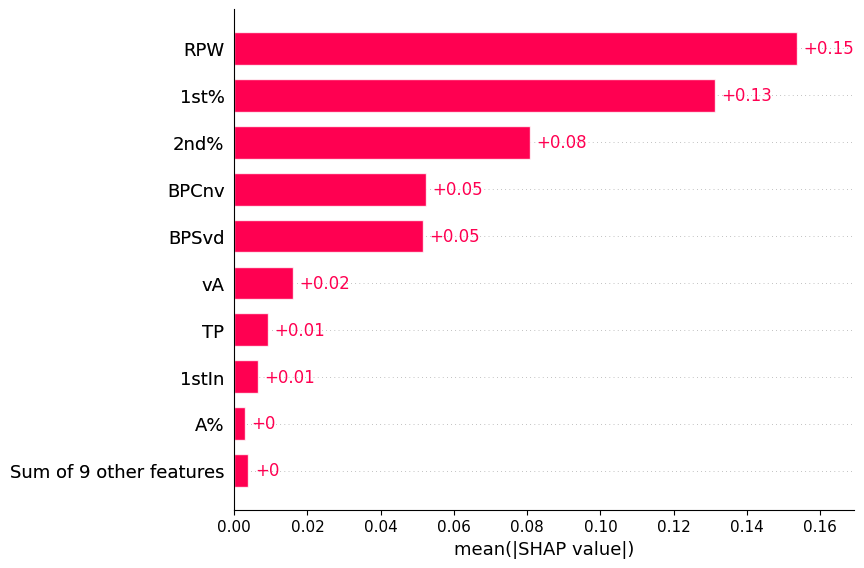

SHAP - Distribución e impacto (beeswarm):


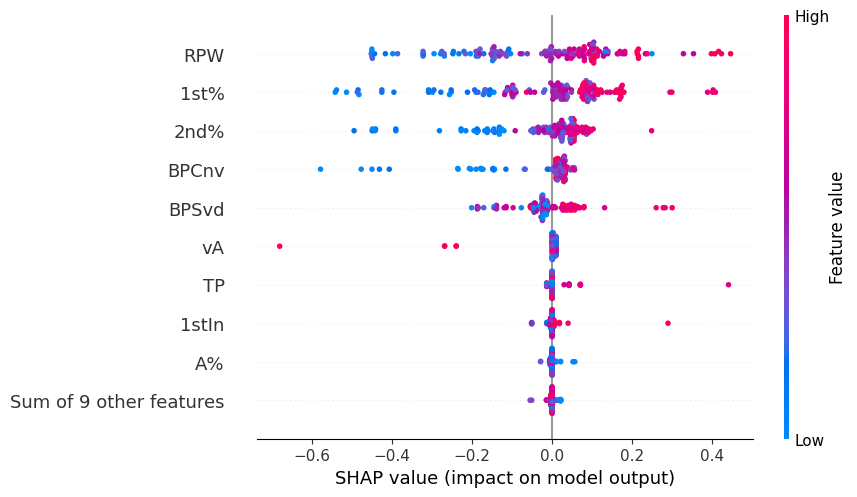


Archivo: AndreyRublev_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score     support
0              0.784314  0.800000  0.792079   50.000000
1              0.879518  0.869048  0.874251   84.000000
accuracy       0.843284  0.843284  0.843284    0.843284
macro avg      0.831916  0.834524  0.833165  134.000000
weighted avg   0.843994  0.843284  0.843590  134.000000

Importancia de variables:
RPW      0.490946
1st%     0.219461
2nd%     0.059380
BPCnv    0.057040
BPSvd    0.054592
DFs      0.045179
v2nd%    0.019672
SP       0.016525
v1st%    0.016324
DF%      0.008477
1stIn    0.008094
A%       0.004311
vA%      0.000000
TP       0.000000
Aces     0.000000
1SP      0.000000
2SP      0.000000
vA       0.000000
dtype: float64
SHAP - Importancia global (bar):


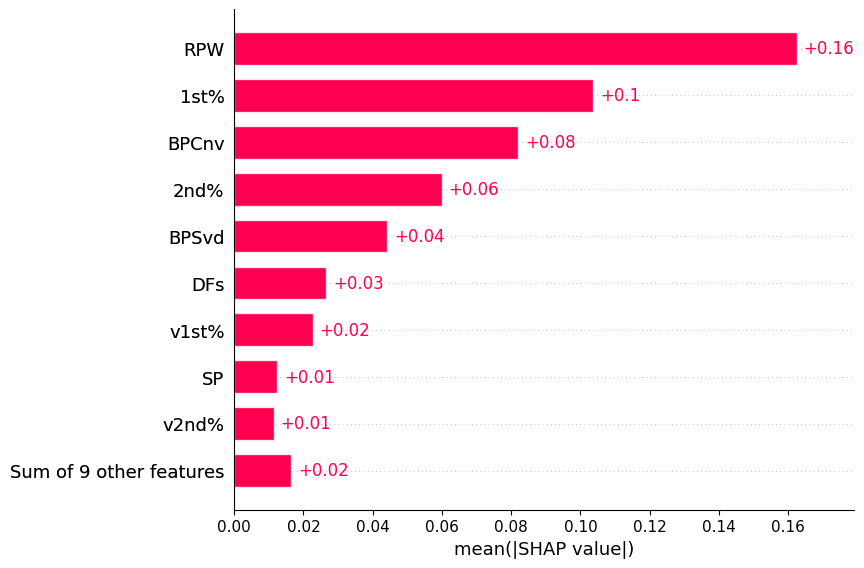

SHAP - Distribución e impacto (beeswarm):


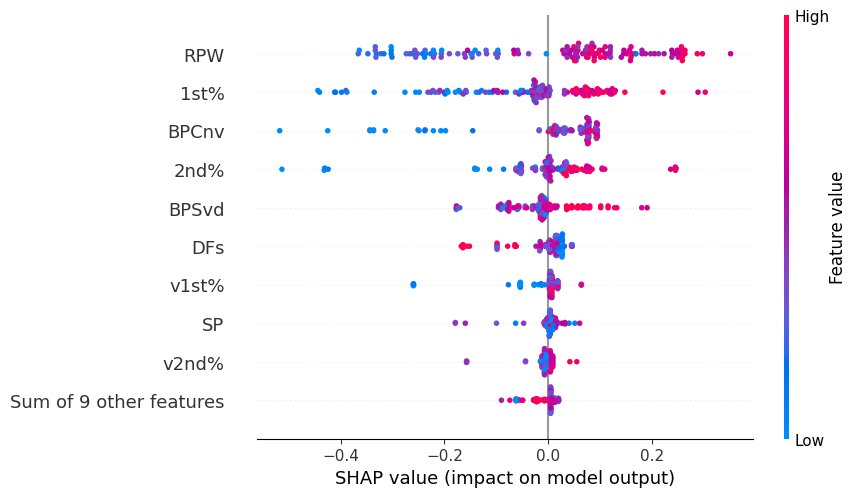


Archivo: CarlosAlcaraz_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score    support
0              0.909091  0.625000  0.740741  16.000000
1              0.896552  0.981132  0.936937  53.000000
accuracy       0.898551  0.898551  0.898551   0.898551
macro avg      0.902821  0.803066  0.838839  69.000000
weighted avg   0.899459  0.898551  0.891442  69.000000

Importancia de variables:
RPW      0.478583
2nd%     0.174426
1st%     0.156695
BPSvd    0.058534
BPCnv    0.043716
TP       0.034755
1stIn    0.033982
v1st%    0.019308
DF%      0.000000
A%       0.000000
v2nd%    0.000000
vA%      0.000000
Aces     0.000000
DFs      0.000000
SP       0.000000
1SP      0.000000
2SP      0.000000
vA       0.000000
dtype: float64
SHAP - Importancia global (bar):


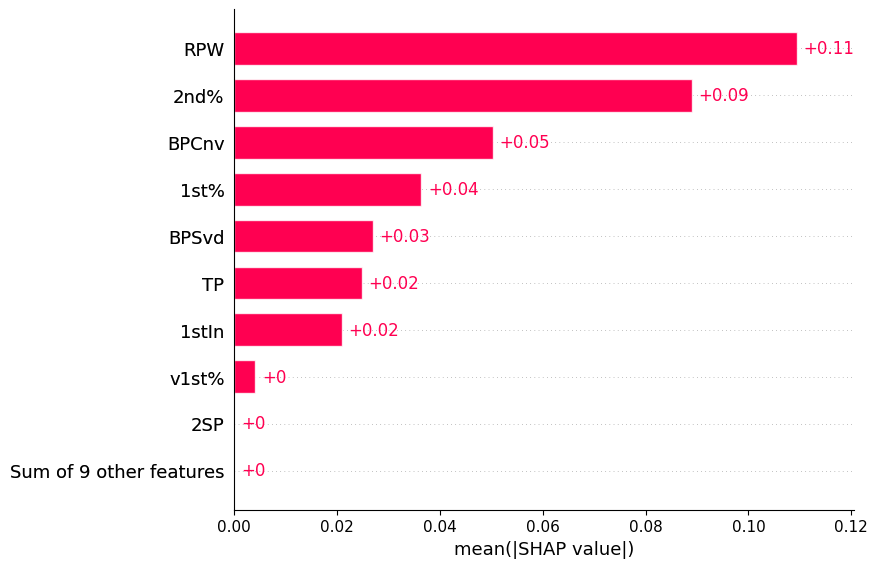

SHAP - Distribución e impacto (beeswarm):


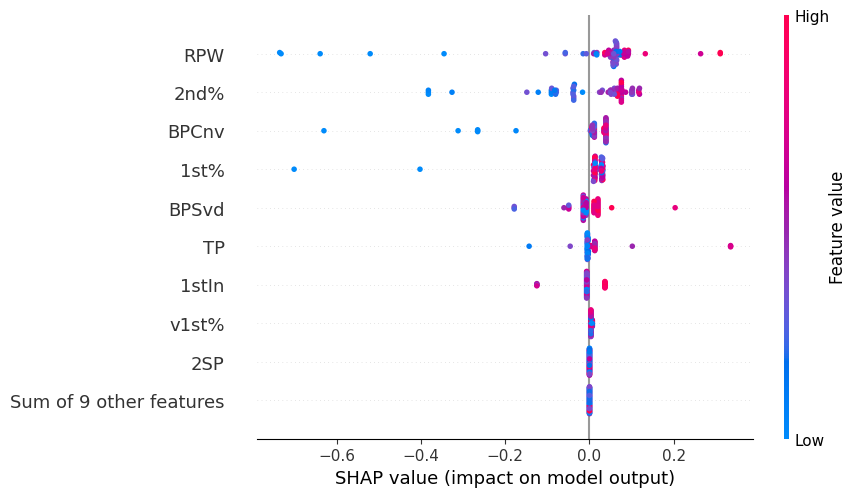


Archivo: CasperRuud_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score    support
0              0.882353  0.750000  0.810811   40.00000
1              0.866667  0.942029  0.902778   69.00000
accuracy       0.871560  0.871560  0.871560    0.87156
macro avg      0.874510  0.846014  0.856794  109.00000
weighted avg   0.872423  0.871560  0.869028  109.00000

Importancia de variables:
RPW      0.497848
1st%     0.182460
2nd%     0.106727
BPCnv    0.054363
SP       0.032462
BPSvd    0.026903
1stIn    0.025199
DFs      0.024940
v2nd%    0.021402
vA       0.010809
2SP      0.008946
Aces     0.007940
DF%      0.000000
A%       0.000000
v1st%    0.000000
vA%      0.000000
TP       0.000000
1SP      0.000000
dtype: float64
SHAP - Importancia global (bar):


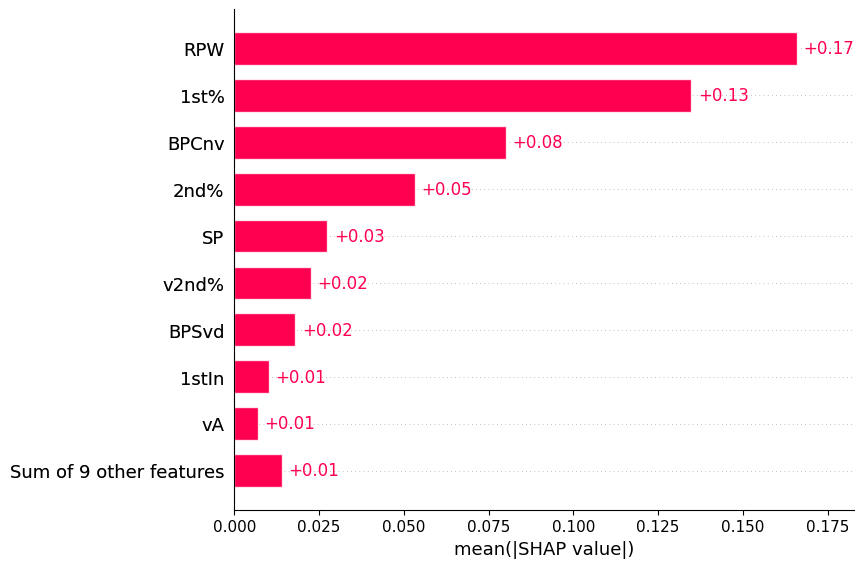

SHAP - Distribución e impacto (beeswarm):


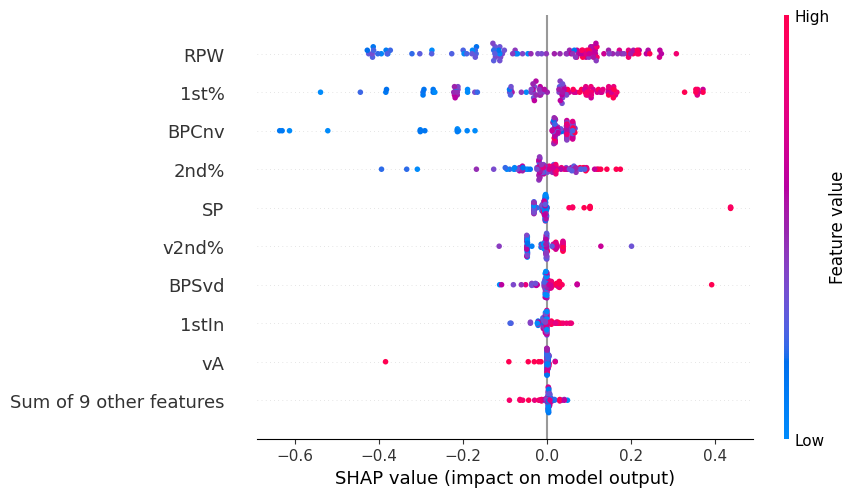


Archivo: DaniilMedvedev_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score     support
0              0.864865  0.842105  0.853333   38.000000
1              0.935484  0.945652  0.940541   92.000000
accuracy       0.915385  0.915385  0.915385    0.915385
macro avg      0.900174  0.893879  0.896937  130.000000
weighted avg   0.914841  0.915385  0.915049  130.000000

Importancia de variables:
RPW      0.555385
1st%     0.186205
2nd%     0.127851
v1st%    0.029012
BPSvd    0.027262
TP       0.023097
1SP      0.020500
SP       0.016578
BPCnv    0.012409
A%       0.001702
DF%      0.000000
v2nd%    0.000000
1stIn    0.000000
vA%      0.000000
DFs      0.000000
Aces     0.000000
2SP      0.000000
vA       0.000000
dtype: float64
SHAP - Importancia global (bar):


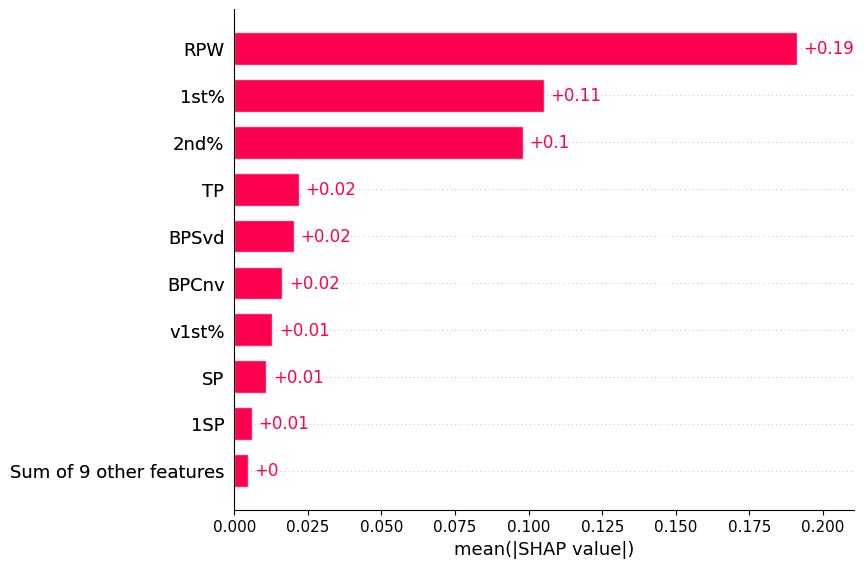

SHAP - Distribución e impacto (beeswarm):


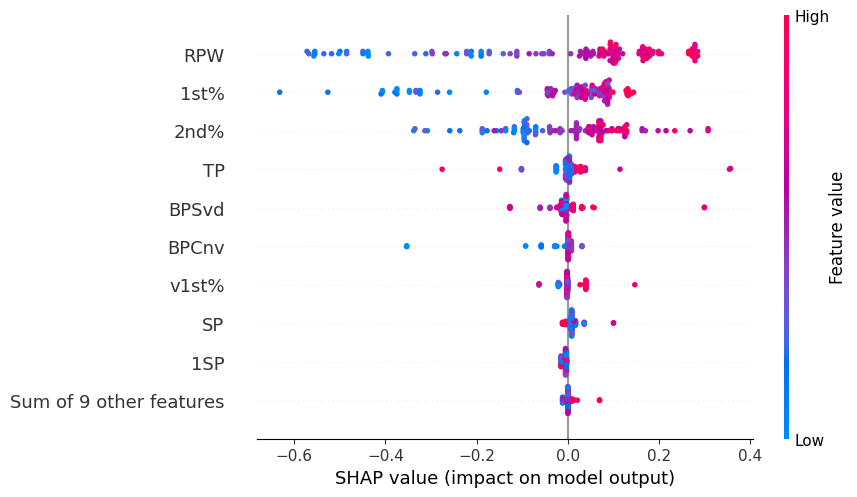


Archivo: HolgerRune_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score    support
0              0.722222  0.866667  0.787879  15.000000
1              0.958333  0.901961  0.929293  51.000000
accuracy       0.893939  0.893939  0.893939   0.893939
macro avg      0.840278  0.884314  0.858586  66.000000
weighted avg   0.904672  0.893939  0.897153  66.000000

Importancia de variables:
RPW      0.439761
1st%     0.209506
2nd%     0.178253
BPSvd    0.071052
1stIn    0.035931
v1st%    0.019367
DFs      0.016114
SP       0.015907
2SP      0.014110
A%       0.000000
DF%      0.000000
vA%      0.000000
v2nd%    0.000000
BPCnv    0.000000
Aces     0.000000
TP       0.000000
1SP      0.000000
vA       0.000000
dtype: float64
SHAP - Importancia global (bar):


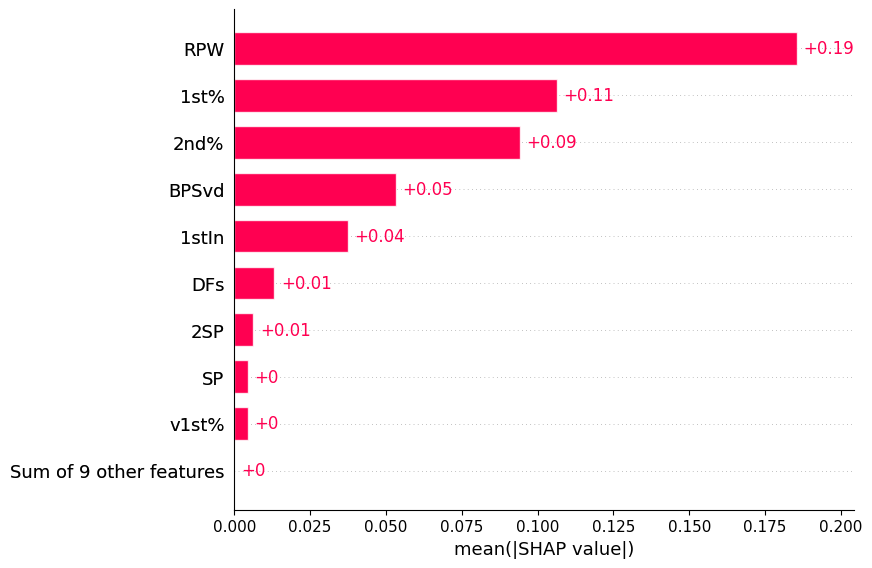

SHAP - Distribución e impacto (beeswarm):


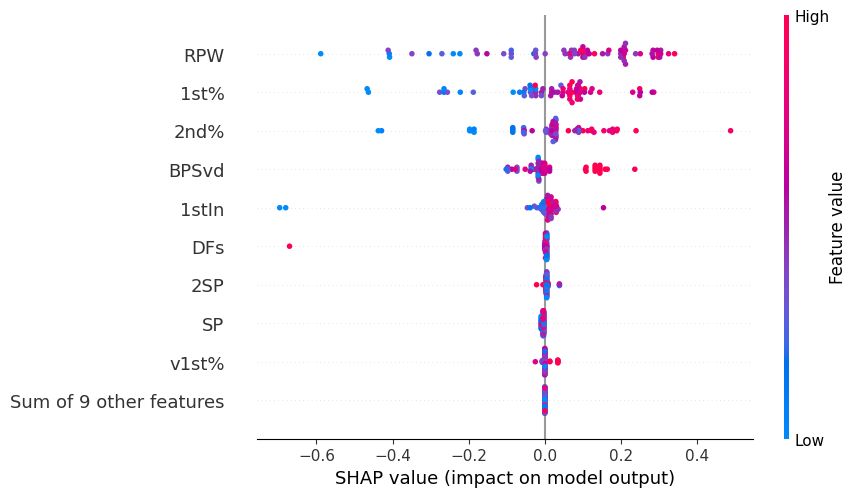


Archivo: HubertHurkacz_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score     support
0              0.736842  0.777778  0.756757   36.000000
1              0.882353  0.857143  0.869565   70.000000
accuracy       0.830189  0.830189  0.830189    0.830189
macro avg      0.809598  0.817460  0.813161  106.000000
weighted avg   0.832934  0.830189  0.831253  106.000000

Importancia de variables:
RPW      0.425229
1st%     0.274031
2nd%     0.128116
BPCnv    0.045306
v2nd%    0.039338
BPSvd    0.037423
v1st%    0.026760
TP       0.013487
1stIn    0.005620
SP       0.004690
DF%      0.000000
A%       0.000000
vA%      0.000000
Aces     0.000000
DFs      0.000000
1SP      0.000000
2SP      0.000000
vA       0.000000
dtype: float64
SHAP - Importancia global (bar):


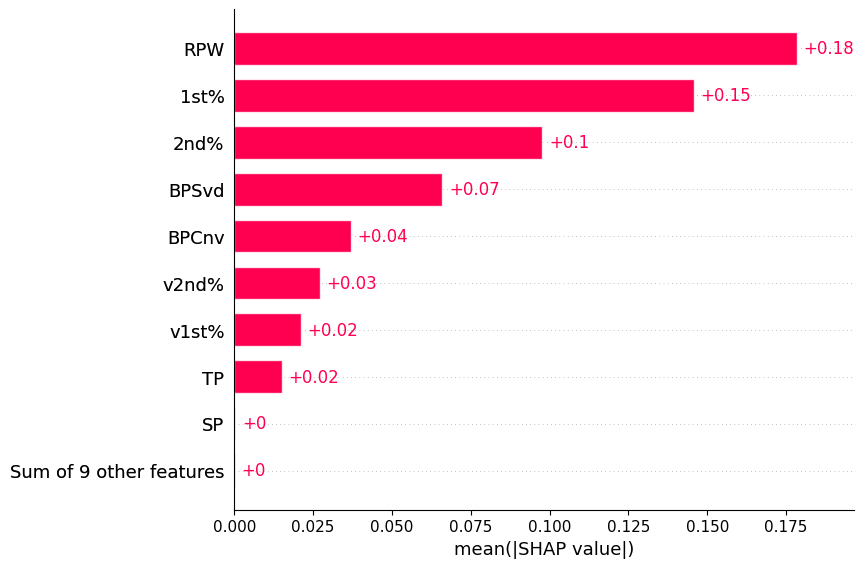

SHAP - Distribución e impacto (beeswarm):


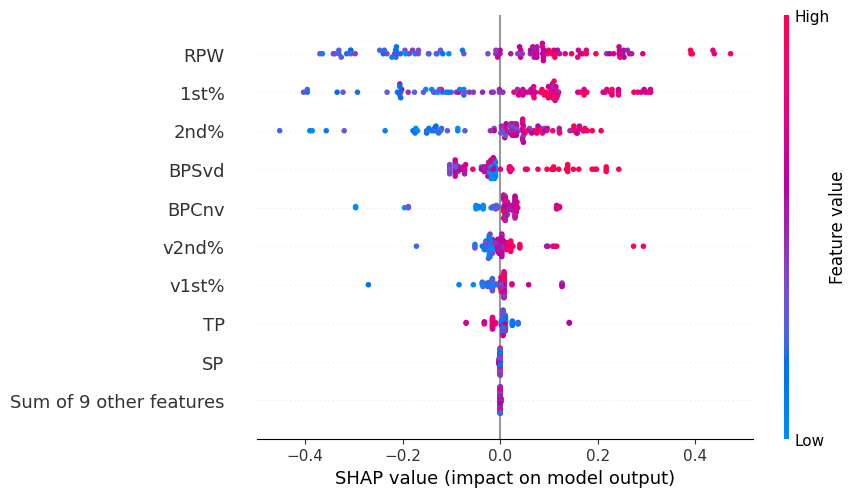


Archivo: JannikSinner_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score    support
0              0.714286  0.789474  0.750000  19.000000
1              0.933333  0.903226  0.918033  62.000000
accuracy       0.876543  0.876543  0.876543   0.876543
macro avg      0.823810  0.846350  0.834016  81.000000
weighted avg   0.881952  0.876543  0.878618  81.000000

Importancia de variables:
1st%     0.363397
RPW      0.332280
2nd%     0.077688
2SP      0.072041
BPCnv    0.046796
1stIn    0.033179
A%       0.022399
vA%      0.018149
DFs      0.017389
TP       0.016681
DF%      0.000000
v2nd%    0.000000
BPSvd    0.000000
v1st%    0.000000
Aces     0.000000
SP       0.000000
1SP      0.000000
vA       0.000000
dtype: float64
SHAP - Importancia global (bar):


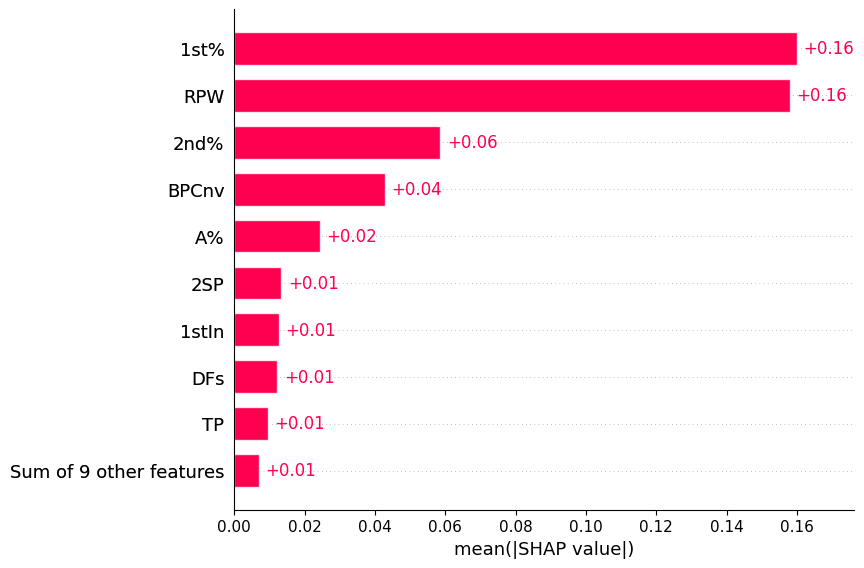

SHAP - Distribución e impacto (beeswarm):


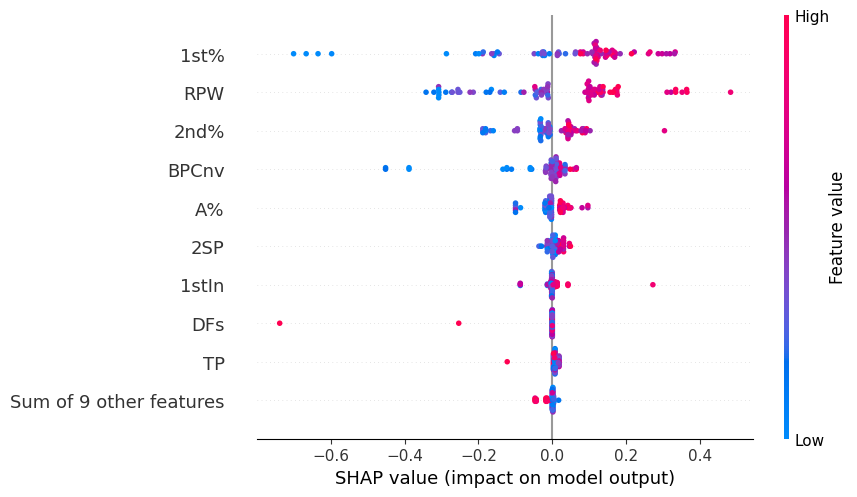


Archivo: NovakDjokovic_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score     support
0              0.717949  0.666667  0.691358   42.000000
1              0.937500  0.950226  0.943820  221.000000
accuracy       0.904943  0.904943  0.904943    0.904943
macro avg      0.827724  0.808446  0.817589  263.000000
weighted avg   0.902439  0.904943  0.903503  263.000000

Importancia de variables:
RPW      0.519726
1st%     0.248584
2nd%     0.110775
BPCnv    0.034278
TP       0.029569
BPSvd    0.017652
DFs      0.014803
vA       0.012460
vA%      0.010594
v2nd%    0.001559
DF%      0.000000
A%       0.000000
v1st%    0.000000
1stIn    0.000000
Aces     0.000000
SP       0.000000
1SP      0.000000
2SP      0.000000
dtype: float64
SHAP - Importancia global (bar):


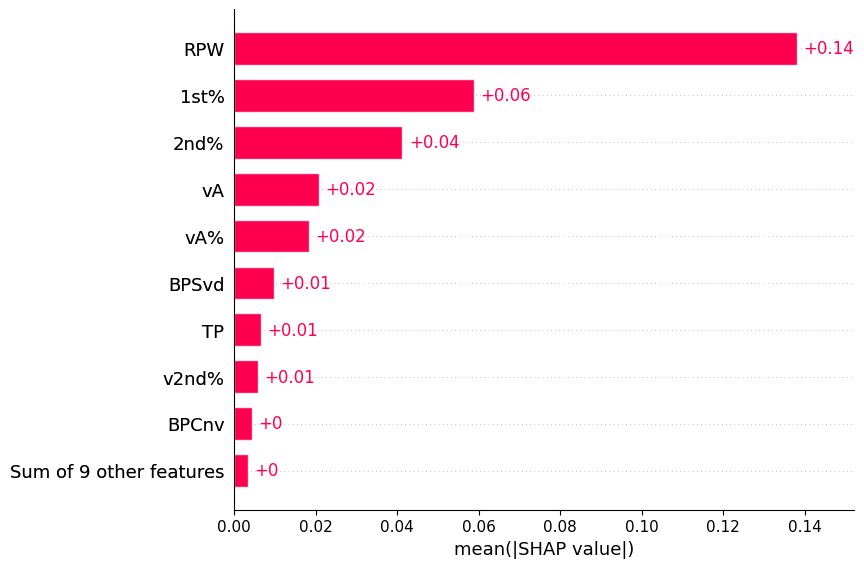

SHAP - Distribución e impacto (beeswarm):


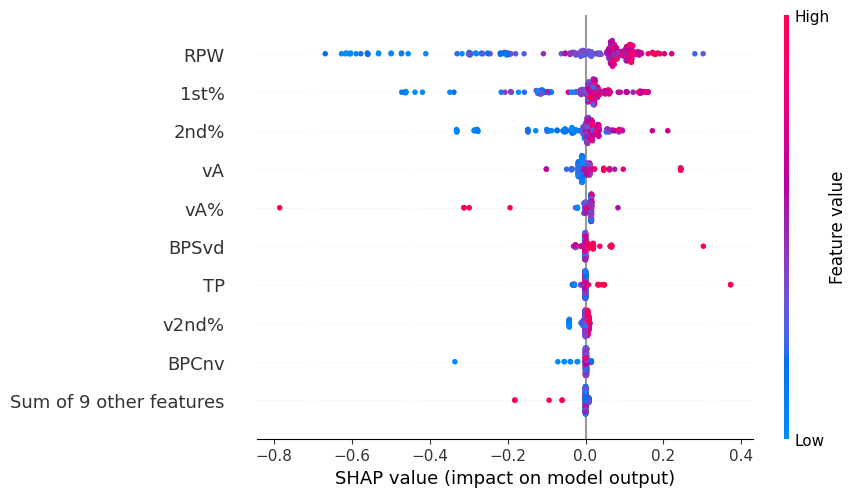


Archivo: StefanosTsitsipas_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score     support
0              0.843137  0.843137  0.843137   51.000000
1              0.887324  0.887324  0.887324   71.000000
accuracy       0.868852  0.868852  0.868852    0.868852
macro avg      0.865231  0.865231  0.865231  122.000000
weighted avg   0.868852  0.868852  0.868852  122.000000

Importancia de variables:
RPW      0.435528
1st%     0.190461
2nd%     0.096671
BPSvd    0.092128
BPCnv    0.068528
v1st%    0.038878
SP       0.022003
1stIn    0.018396
TP       0.015591
vA%      0.013083
DFs      0.008731
A%       0.000000
DF%      0.000000
v2nd%    0.000000
Aces     0.000000
1SP      0.000000
2SP      0.000000
vA       0.000000
dtype: float64
SHAP - Importancia global (bar):


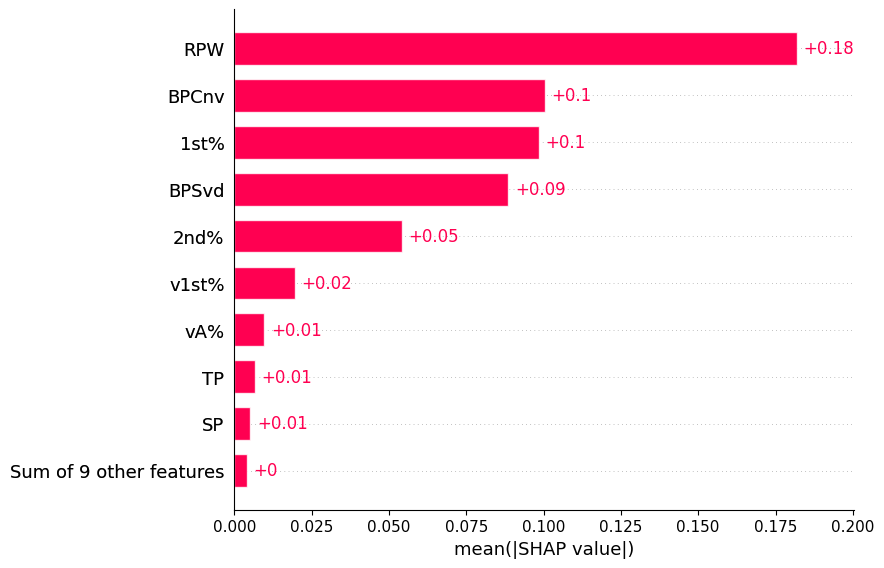

SHAP - Distribución e impacto (beeswarm):


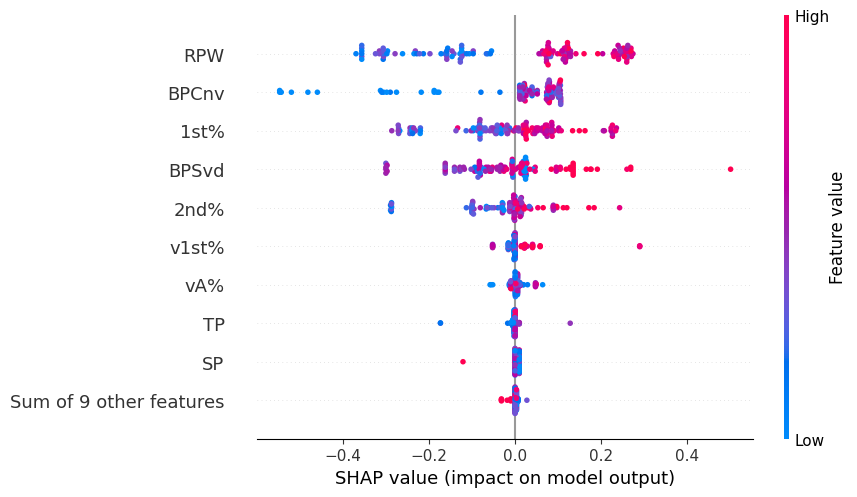

In [6]:
for nombre_jugador, (X, y) in datos_jugadores.items():
    print("\nArchivo:", nombre_jugador)

    # Entrenamiento y evaluación
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)

    report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    print("Evaluación del modelo:")
    print(report_df)
    print("\nImportancia de variables:")
    print(importances)

    # SHAP
    try:
        explainer = shap.Explainer(dt_model, X_train)
        shap_values = explainer(X_test, check_additivity=False)

        if len(shap_values.values.shape) == 3:
            shap_values_class1 = shap.Explanation(
                values=shap_values.values[:, :, 1],
                base_values=shap_values.base_values[:, 1],
                data=shap_values.data,
                feature_names=shap_values.feature_names
            )
        else:
            shap_values_class1 = shap_values

        print("SHAP - Importancia global (bar):")
        shap.plots.bar(shap_values_class1, show=True)

        print("SHAP - Distribución e impacto (beeswarm):")
        shap.plots.beeswarm(shap_values_class1, show=True)

    except Exception as e:
        print("Error en SHAP:", e)


Archivo: AlexanderZverev_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score     support
0              0.913043  0.807692  0.857143   52.000000
1              0.900990  0.957895  0.928571   95.000000
accuracy       0.904762  0.904762  0.904762    0.904762
macro avg      0.907017  0.882794  0.892857  147.000000
weighted avg   0.905254  0.904762  0.903304  147.000000

Importancia de variables:
1st%     0.192782
RPW      0.151071
2nd%     0.110925
BPCnv    0.096406
v1st%    0.084669
BPSvd    0.074963
v2nd%    0.056870
A%       0.033057
DF%      0.029964
1stIn    0.021599
DFs      0.021490
vA%      0.020281
TP       0.020085
2SP      0.018786
vA       0.017654
SP       0.017316
Aces     0.016487
1SP      0.015595
dtype: float64
SHAP - Importancia global (bar):


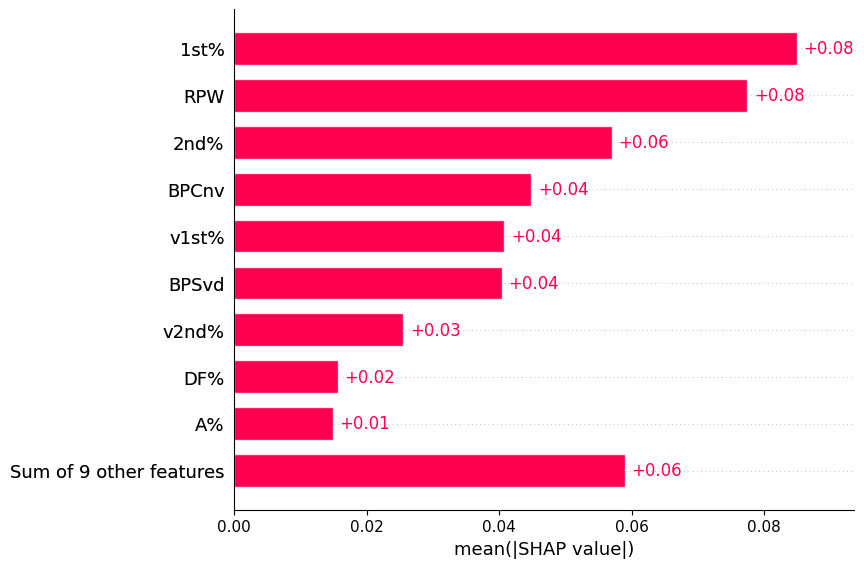

SHAP - Distribución e impacto (beeswarm):


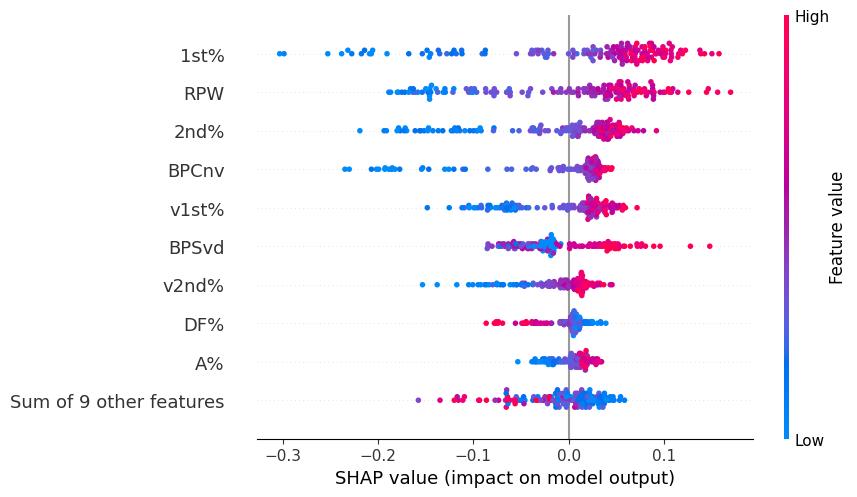


Archivo: AndreyRublev_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score    support
0              0.888889  0.800000  0.842105   50.00000
1              0.887640  0.940476  0.913295   84.00000
accuracy       0.888060  0.888060  0.888060    0.88806
macro avg      0.888265  0.870238  0.877700  134.00000
weighted avg   0.888106  0.888060  0.886732  134.00000

Importancia de variables:
RPW      0.214885
1st%     0.141525
2nd%     0.108041
v1st%    0.107068
BPCnv    0.093054
v2nd%    0.066648
BPSvd    0.053784
A%       0.032277
DF%      0.021206
1stIn    0.019872
SP       0.019699
TP       0.019652
2SP      0.019171
vA%      0.018368
vA       0.017731
DFs      0.016313
1SP      0.015721
Aces     0.014985
dtype: float64
SHAP - Importancia global (bar):


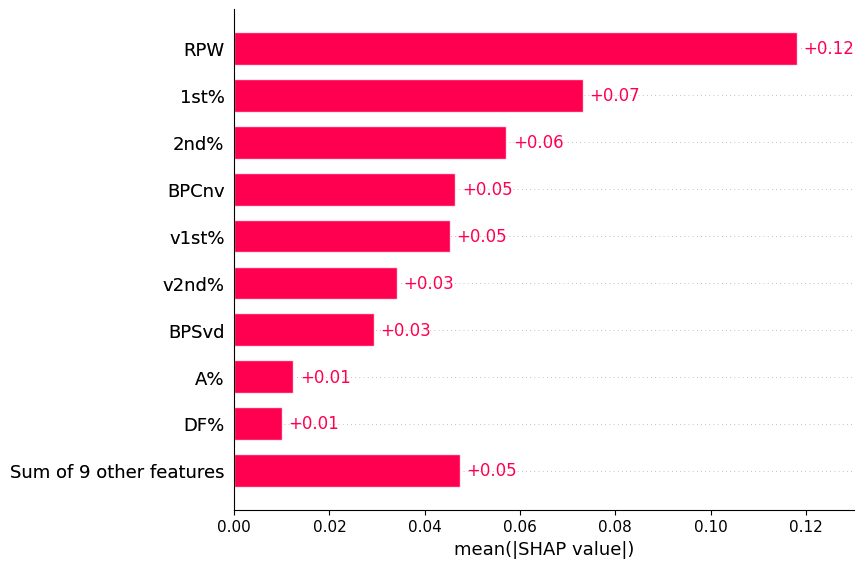

SHAP - Distribución e impacto (beeswarm):


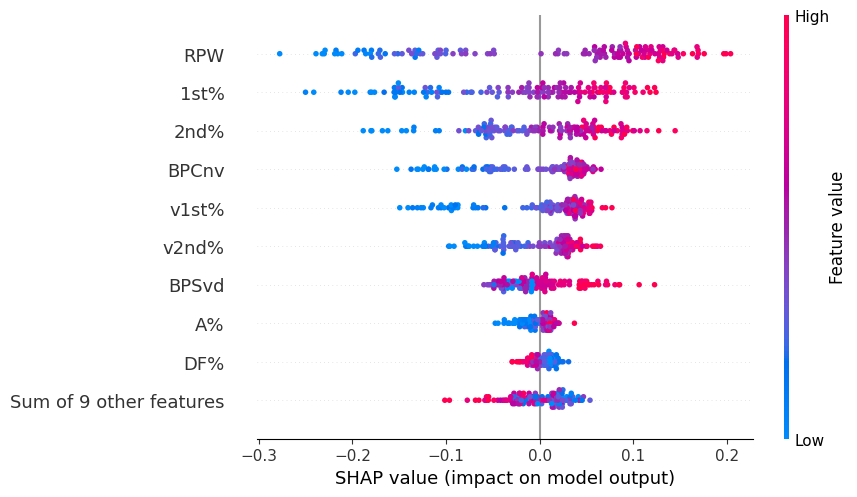


Archivo: CarlosAlcaraz_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score    support
0              1.000000  0.500000  0.666667  16.000000
1              0.868852  1.000000  0.929825  53.000000
accuracy       0.884058  0.884058  0.884058   0.884058
macro avg      0.934426  0.750000  0.798246  69.000000
weighted avg   0.899263  0.884058  0.868802  69.000000

Importancia de variables:
RPW      0.200956
2nd%     0.125547
1st%     0.121406
BPCnv    0.102767
v1st%    0.082007
v2nd%    0.073324
BPSvd    0.052417
SP       0.028755
TP       0.028019
1SP      0.025327
2SP      0.024787
A%       0.023255
1stIn    0.022326
vA       0.021859
vA%      0.021462
DF%      0.018831
Aces     0.015993
DFs      0.010962
dtype: float64
SHAP - Importancia global (bar):


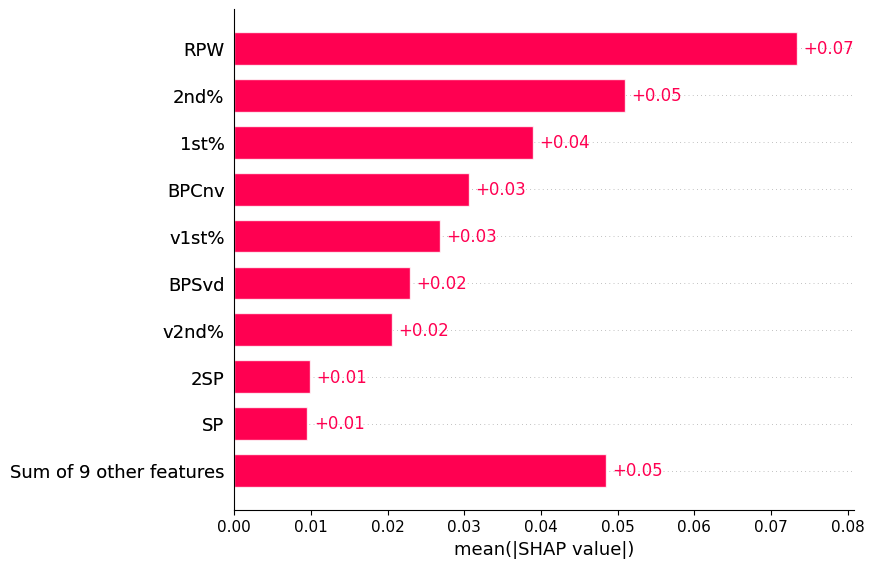

SHAP - Distribución e impacto (beeswarm):


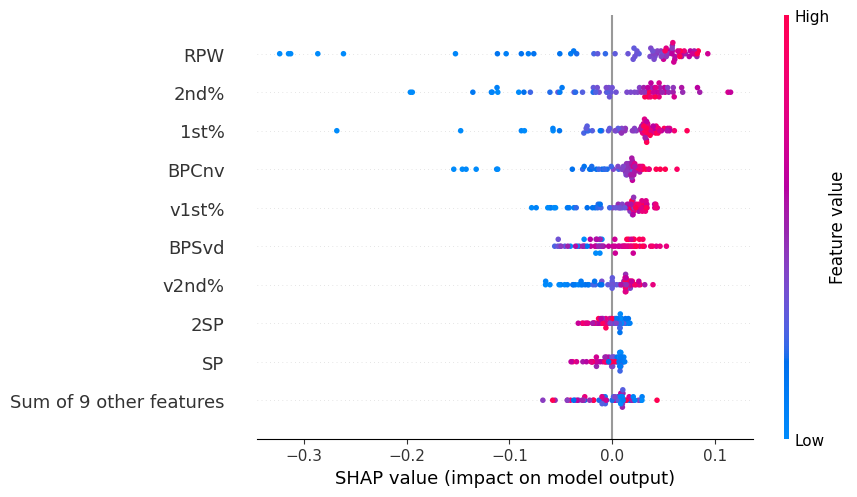


Archivo: CasperRuud_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score     support
0              0.942857  0.825000  0.880000   40.000000
1              0.905405  0.971014  0.937063   69.000000
accuracy       0.917431  0.917431  0.917431    0.917431
macro avg      0.924131  0.898007  0.908531  109.000000
weighted avg   0.919149  0.917431  0.916122  109.000000

Importancia de variables:
RPW      0.202063
1st%     0.162751
BPCnv    0.106896
2nd%     0.104361
v1st%    0.096874
v2nd%    0.077721
BPSvd    0.044709
A%       0.023754
1SP      0.021542
TP       0.021024
vA%      0.018933
DF%      0.018304
SP       0.018215
2SP      0.018085
1stIn    0.018084
vA       0.017382
DFs      0.014913
Aces     0.014389
dtype: float64
SHAP - Importancia global (bar):


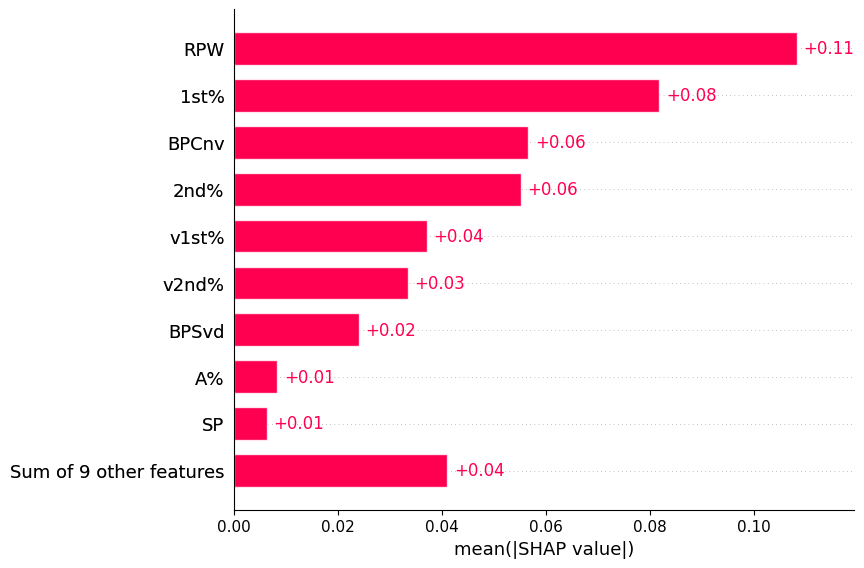

SHAP - Distribución e impacto (beeswarm):


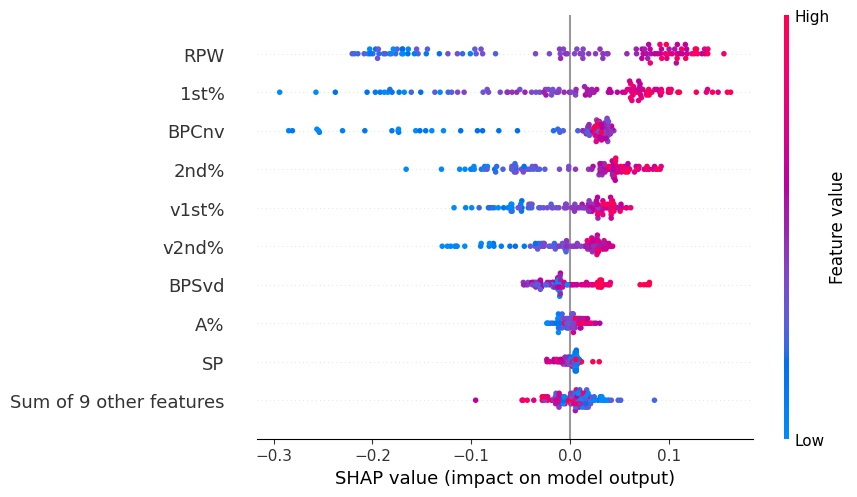


Archivo: DaniilMedvedev_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score     support
0              0.918919  0.894737  0.906667   38.000000
1              0.956989  0.967391  0.962162   92.000000
accuracy       0.946154  0.946154  0.946154    0.946154
macro avg      0.937954  0.931064  0.934414  130.000000
weighted avg   0.945861  0.946154  0.945940  130.000000

Importancia de variables:
RPW      0.202599
1st%     0.147488
2nd%     0.125879
BPCnv    0.101158
v2nd%    0.088909
v1st%    0.069846
BPSvd    0.041074
A%       0.034354
TP       0.026679
2SP      0.025821
1stIn    0.020213
SP       0.019702
Aces     0.017933
1SP      0.017663
DF%      0.016943
vA%      0.016133
vA       0.014567
DFs      0.013039
dtype: float64
SHAP - Importancia global (bar):


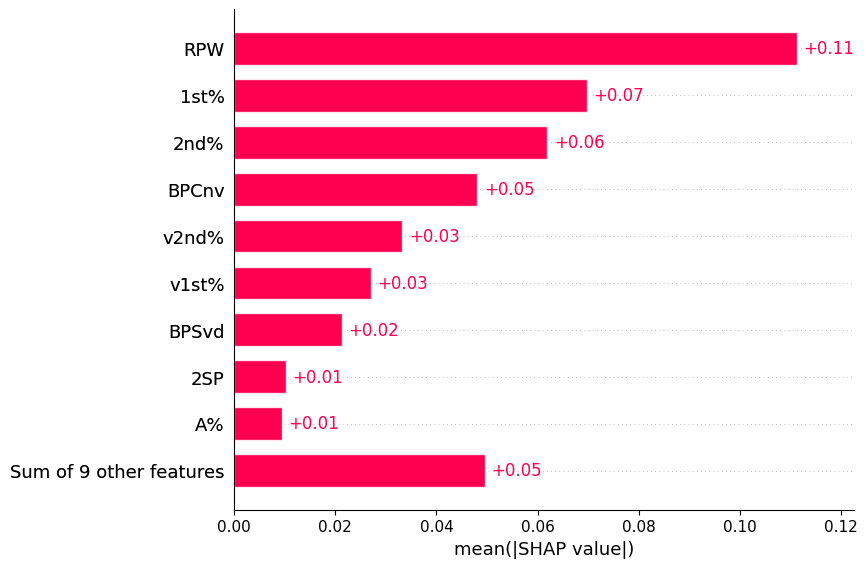

SHAP - Distribución e impacto (beeswarm):


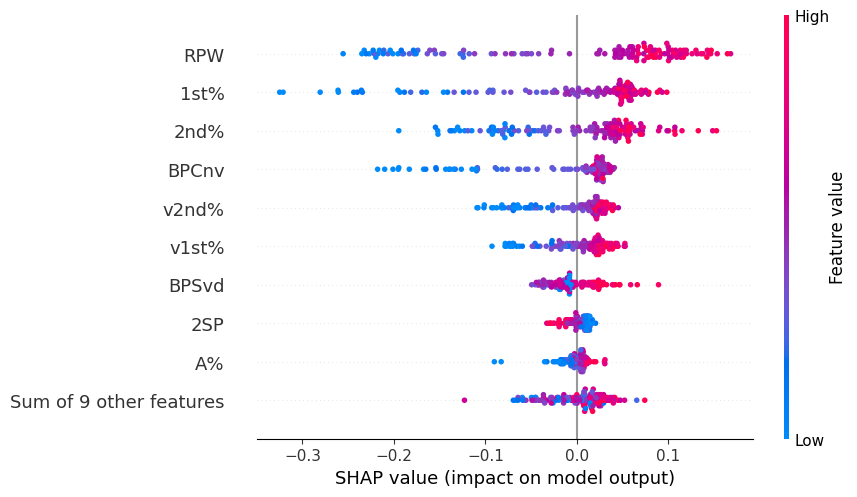


Archivo: HolgerRune_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score    support
0              0.928571  0.866667  0.896552  15.000000
1              0.961538  0.980392  0.970874  51.000000
accuracy       0.954545  0.954545  0.954545   0.954545
macro avg      0.945055  0.923529  0.933713  66.000000
weighted avg   0.954046  0.954545  0.953982  66.000000

Importancia de variables:
RPW      0.178626
1st%     0.159079
2nd%     0.129868
v1st%    0.091948
v2nd%    0.077034
BPCnv    0.064842
BPSvd    0.050756
A%       0.032498
DF%      0.029946
1stIn    0.028135
vA%      0.023564
2SP      0.022026
Aces     0.021499
SP       0.020066
TP       0.018604
vA       0.018212
1SP      0.018208
DFs      0.015087
dtype: float64
SHAP - Importancia global (bar):


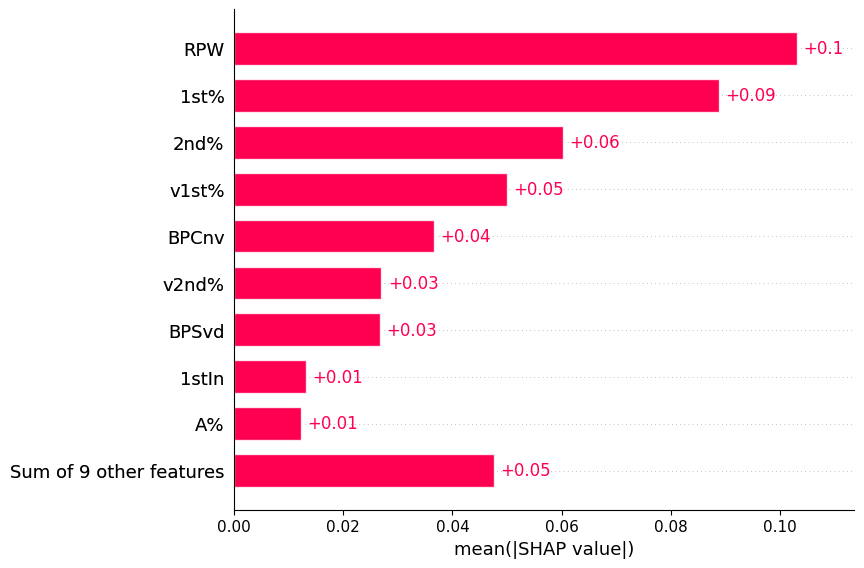

SHAP - Distribución e impacto (beeswarm):


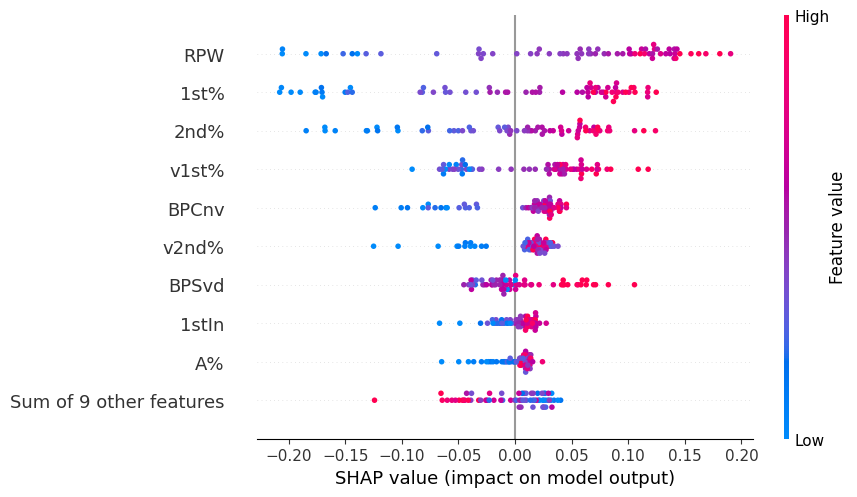


Archivo: HubertHurkacz_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score     support
0              0.909091  0.833333  0.869565   36.000000
1              0.917808  0.957143  0.937063   70.000000
accuracy       0.915094  0.915094  0.915094    0.915094
macro avg      0.913450  0.895238  0.903314  106.000000
weighted avg   0.914848  0.915094  0.914139  106.000000

Importancia de variables:
RPW      0.178848
1st%     0.146179
BPCnv    0.103843
2nd%     0.096212
v2nd%    0.082123
v1st%    0.075115
A%       0.046367
BPSvd    0.038417
1SP      0.027123
SP       0.026990
TP       0.025148
DF%      0.024164
DFs      0.023628
Aces     0.022565
vA       0.022390
2SP      0.021839
vA%      0.019970
1stIn    0.019079
dtype: float64
SHAP - Importancia global (bar):


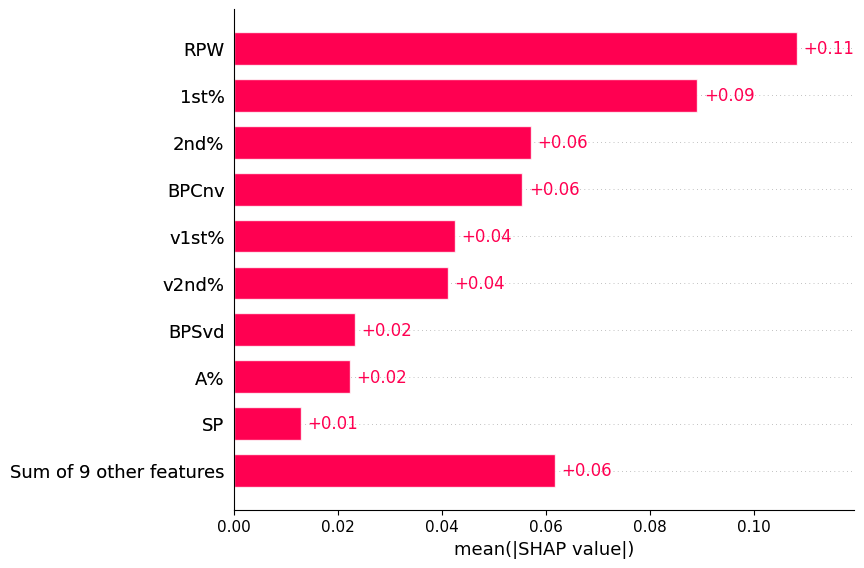

SHAP - Distribución e impacto (beeswarm):


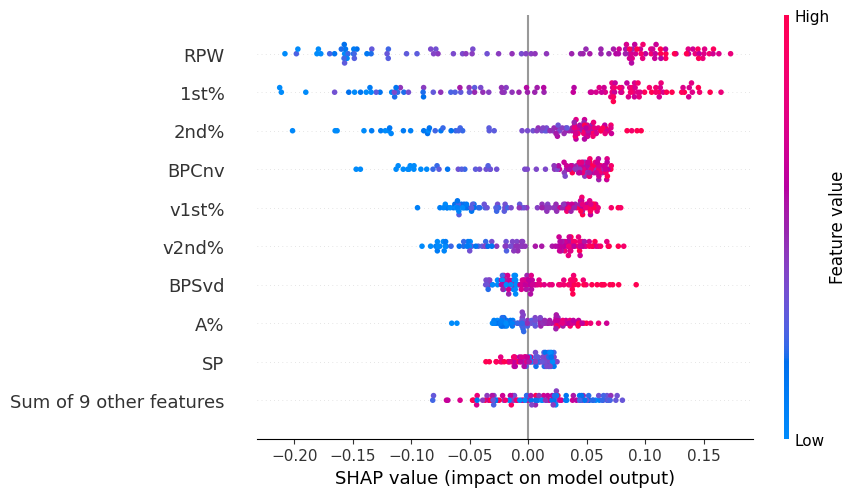


Archivo: JannikSinner_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score   support
0              0.833333  0.789474  0.810811  19.00000
1              0.936508  0.951613  0.944000  62.00000
accuracy       0.913580  0.913580  0.913580   0.91358
macro avg      0.884921  0.870543  0.877405  81.00000
weighted avg   0.912306  0.913580  0.912758  81.00000

Importancia de variables:
1st%     0.181429
RPW      0.161436
2nd%     0.103079
BPCnv    0.094000
v1st%    0.081087
A%       0.069638
v2nd%    0.059594
BPSvd    0.051832
Aces     0.028866
vA       0.025592
TP       0.024074
2SP      0.021239
vA%      0.019087
DF%      0.018490
1SP      0.018067
SP       0.017842
1stIn    0.013263
DFs      0.011388
dtype: float64
SHAP - Importancia global (bar):


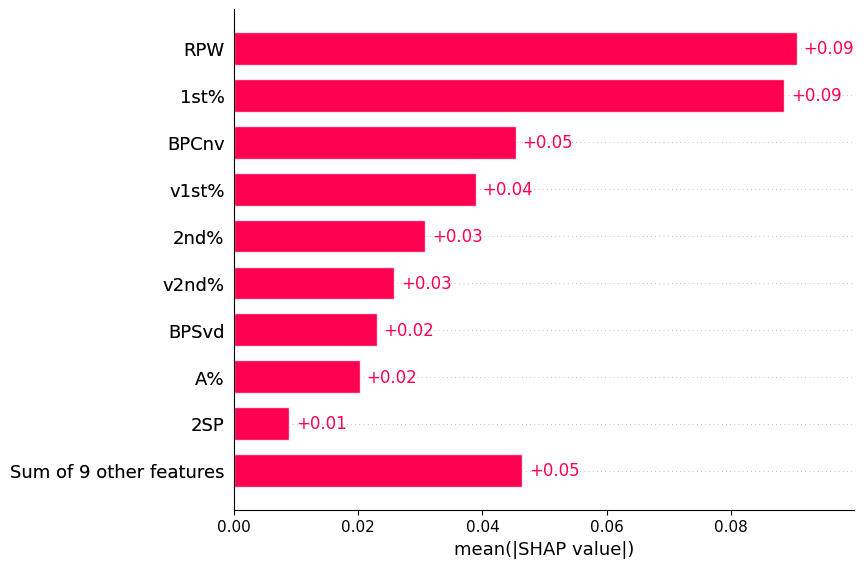

SHAP - Distribución e impacto (beeswarm):


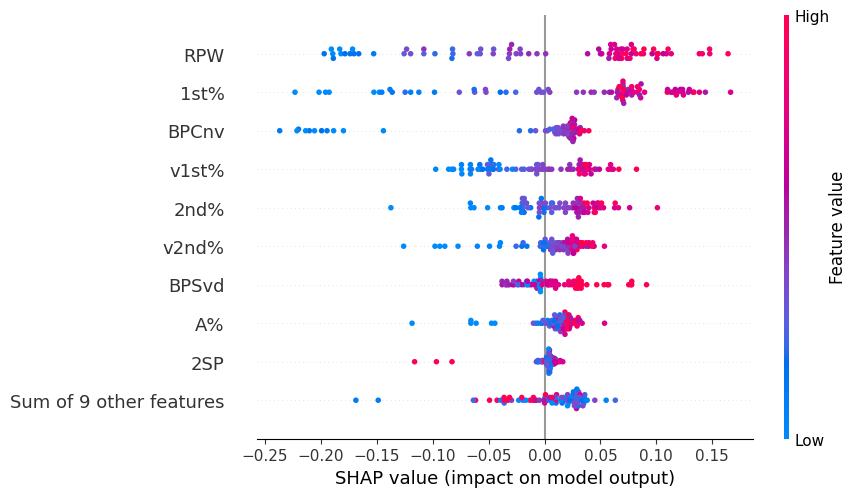


Archivo: NovakDjokovic_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score     support
0              0.848485  0.666667  0.746667   42.000000
1              0.939130  0.977376  0.957871  221.000000
accuracy       0.927757  0.927757  0.927757    0.927757
macro avg      0.893808  0.822021  0.852269  263.000000
weighted avg   0.924655  0.927757  0.924143  263.000000

Importancia de variables:
RPW      0.237464
1st%     0.171702
v2nd%    0.102744
BPCnv    0.092652
v1st%    0.084272
2nd%     0.083006
BPSvd    0.029181
A%       0.024442
TP       0.022492
2SP      0.018959
1SP      0.018631
SP       0.018598
vA%      0.018507
1stIn    0.018106
Aces     0.016110
DF%      0.015425
vA       0.014272
DFs      0.013437
dtype: float64
SHAP - Importancia global (bar):


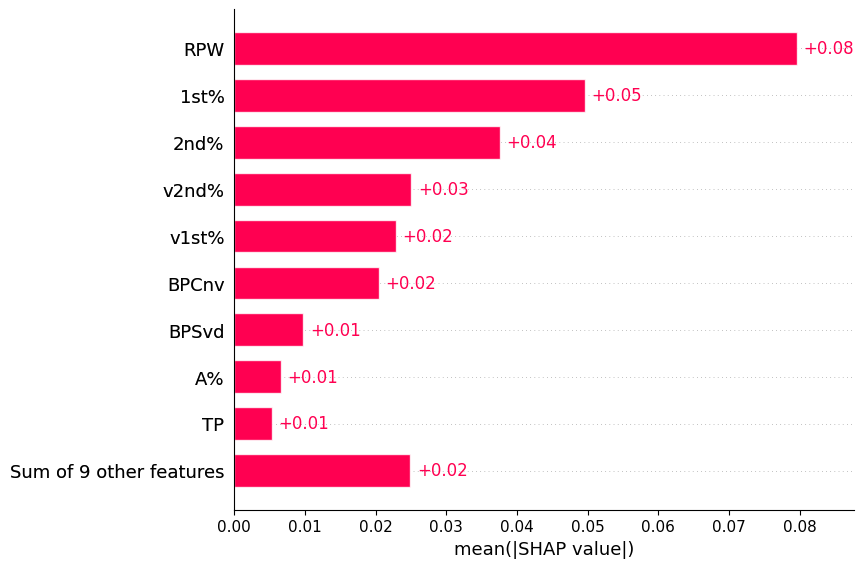

SHAP - Distribución e impacto (beeswarm):


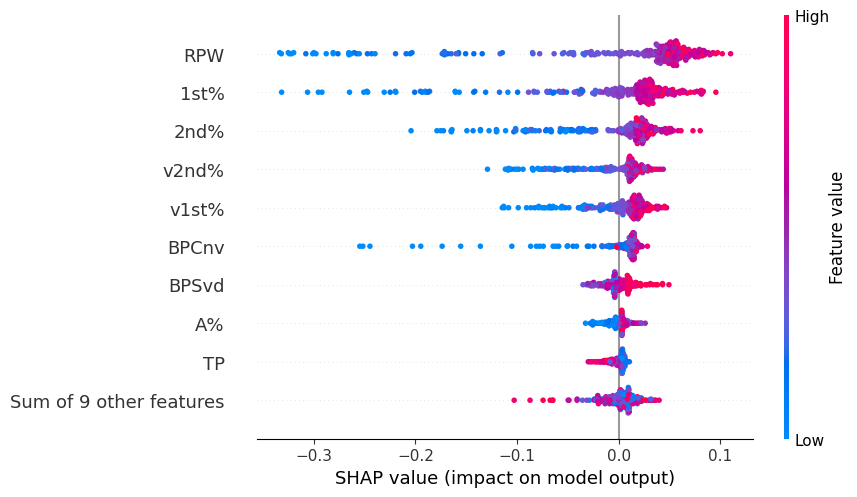


Archivo: StefanosTsitsipas_matches_full_con_WorL.csv
Evaluación del modelo:
              precision    recall  f1-score     support
0              0.906977  0.764706  0.829787   51.000000
1              0.848101  0.943662  0.893333   71.000000
accuracy       0.868852  0.868852  0.868852    0.868852
macro avg      0.877539  0.854184  0.861560  122.000000
weighted avg   0.872713  0.868852  0.866769  122.000000

Importancia de variables:
RPW      0.192866
BPCnv    0.125033
1st%     0.122846
2nd%     0.109805
v1st%    0.099633
v2nd%    0.066592
BPSvd    0.048209
DF%      0.028062
vA       0.024702
vA%      0.024442
A%       0.022955
TP       0.022947
1SP      0.022268
SP       0.020300
1stIn    0.019843
Aces     0.018028
2SP      0.015872
DFs      0.015598
dtype: float64
SHAP - Importancia global (bar):


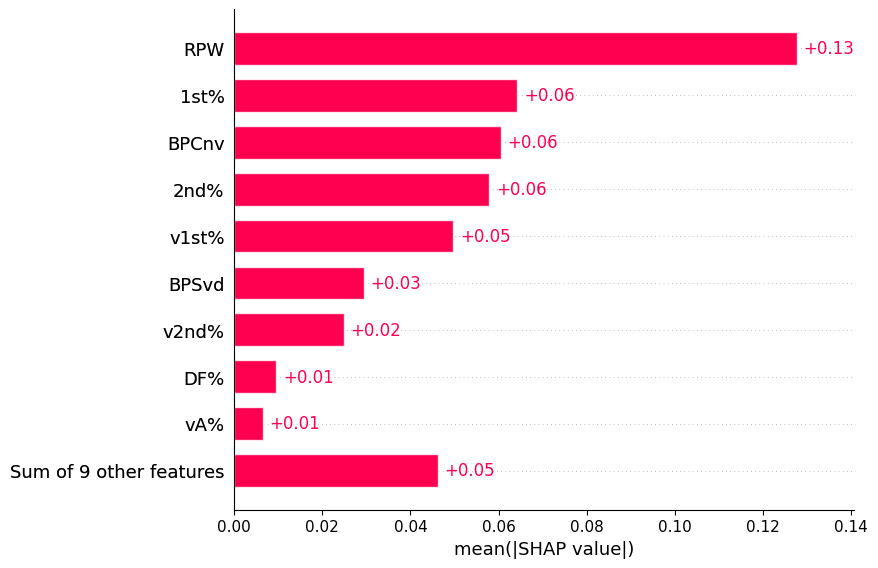

SHAP - Distribución e impacto (beeswarm):


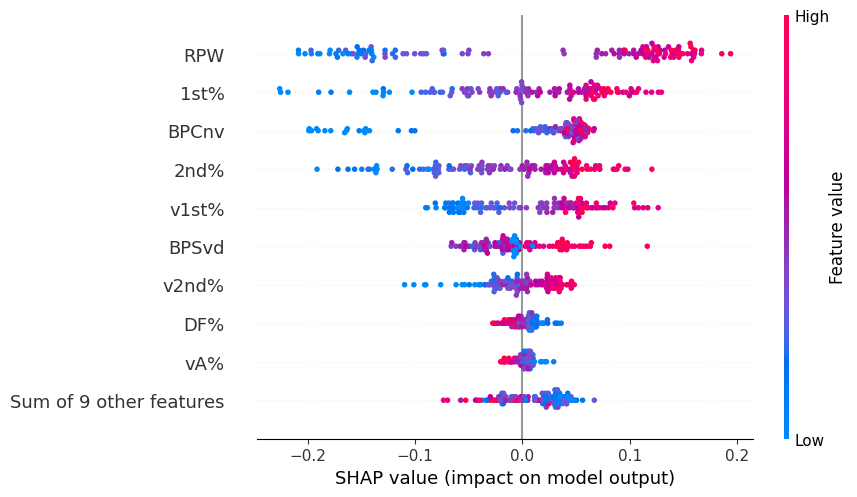

In [7]:
for nombre_jugador, (X, y) in datos_jugadores.items():
    print("\nArchivo:", nombre_jugador)

    # Entrenamiento y evaluación
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    print("Evaluación del modelo:")
    print(report_df)
    print("\nImportancia de variables:")
    print(importances)

    # SHAP
    try:
        explainer = shap.Explainer(rf_model, X_train)
        shap_values = explainer(X_test, check_additivity=False)

        if len(shap_values.values.shape) == 3:
            shap_values_class1 = shap.Explanation(
                values=shap_values.values[:, :, 1],
                base_values=shap_values.base_values[:, 1],
                data=shap_values.data,
                feature_names=shap_values.feature_names
            )
        else:
            shap_values_class1 = shap_values

        print("SHAP - Importancia global (bar):")
        shap.plots.bar(shap_values_class1, show=True)

        print("SHAP - Distribución e impacto (beeswarm):")
        shap.plots.beeswarm(shap_values_class1, show=True)

    except Exception as e:
        print("Error en SHAP:", e)